## Reconstruction

In [1]:
import dolfin as df
import math
import matplotlib.pyplot as plt
import numpy as np
import os

from elasticity_problem import elasticity_problem
from rec_no_reg import no_reg_rec
from rec_with_reg import rec_with_reg
%load_ext autoreload
%autoreload 2

### True parameter mu

In [2]:
# mu_1
class Mu1Expression(df.UserExpression):
    def eval(self, value, x):
        value[0]=0
        if (x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.5) *(x[1] - 0.5)  <= 0.2  *0.2 :
            value[0]= 1
        elif  0.2  *0.2 <= (x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.5) *(x[1] - 0.5)  <= 0.3  *0.3 :
            value[0]= (1-(math.sqrt((x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.5) *(x[1] - 0.5)) - 0.2)/0.1 )**2*(1+2*(math.sqrt((x[0] - 0.5)*(x[0] - 0.5)  + (x[1] - 0.5) *(x[1] - 0.5))-0.2) /0.1) 
        value[0] = 1+value[0]

# mu_2
class Mu2Expression(df.UserExpression):
    def eval(self, value, x):
        value[0]=0
        if (x[0] - 0.2) *(x[0] - 0.2)  + (x[1] - 0.8) *(x[1] - 0.8)  <= 0.1  *0.1 :
            value[0]= 1
        elif  0.1  *0.1 <= (x[0] - 0.2) *(x[0] - 0.2)  + (x[1] - 0.8) *(x[1] - 0.8)  <= 0.15  *0.15 :
            value[0]= (1-(math.sqrt((x[0] - 0.2) *(x[0] - 0.2)  + (x[1] - 0.8) *(x[1] - 0.8)) - 0.1)/0.05 )**2*(1+2*(math.sqrt((x[0] - 0.2)*(x[0] - 0.2)  + (x[1] - 0.8) *(x[1] - 0.8))-0.1) /0.05) 
        elif (x[0] - 0.8) *(x[0] - 0.8)  + (x[1] - 0.2) *(x[1] - 0.2)  <= 0.1  *0.1 :
            value[0]= 2
        elif  0.1  *0.1 <= (x[0] - 0.8) *(x[0] - 0.8)  + (x[1] - 0.2) *(x[1] - 0.2)  <= 0.15  *0.15 :
            value[0]=2*(1-(math.sqrt((x[0] - 0.8) *(x[0] - 0.8)  + (x[1] - 0.2) *(x[1] - 0.2)) - 0.1)/0.05 )**2*(1+2*(math.sqrt((x[0] - 0.8)*(x[0] - 0.8)  + (x[1] - 0.2) *(x[1] - 0.2))-0.1) /0.05)     
        value[0] = 1+value[0]

# mu_3
class Mu3Expression(df.UserExpression):
    def eval(self, value, x):
        value[0]=1
        if (x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.5) *(x[1] - 0.5)  <= 0.4   *0.4 :
            value[0]= 2
        elif  0.4  *0.4 <= (x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.5) *(x[1] - 0.5)  <= 0.45  *0.45:
            value[0]= 1+(1-(math.sqrt((x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.5) *(x[1] - 0.5)) - 0.4)/0.05 )**2*(1+2*(math.sqrt((x[0] - 0.5)*(x[0] - 0.5)  + (x[1] - 0.5) *(x[1] - 0.5))-0.4) /0.05) 

        if (x[0] - 0.35) *(x[0] - 0.35)  + (x[1] - 0.65) *(x[1] - 0.65)  <= 0.1   *0.1 :
            value[0]= 3
        elif  0.1  *0.1<= (x[0] - 0.35) *(x[0] - 0.35)  + (x[1] - 0.65) *(x[1] - 0.65)  <= 0.15  *0.15:
            value[0]= 2+(1-(math.sqrt((x[0] - 0.35) *(x[0] - 0.35)  + (x[1] - 0.65) *(x[1] - 0.65)) - 0.1)/0.05 )**2*(1+2*(math.sqrt((x[0] - 0.35)*(x[0] - 0.35)  + (x[1] - 0.65) *(x[1] - 0.65))-0.1) /0.05) 

        if (x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.3) *(x[1] - 0.3)  <= 0.1   *0.1 :
            value[0]= 4  
        elif  0.1  *0.1<= (x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.3) *(x[1] - 0.3) <= 0.15  *0.15:
           value[0]= 2+2*(1-(math.sqrt((x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.3) *(x[1] - 0.3)) - 0.1)/0.05 )**2*(1+2*(math.sqrt((x[0] - 0.5) *(x[0] - 0.5)  + (x[1] - 0.3) *(x[1] - 0.3))-0.1) /0.05)            

        if (x[0] - 0.65) *(x[0] - 0.65)  + (x[1] - 0.65) *(x[1] - 0.65)  <= 0.1   *0.1 :
            value[0]= 3.5       
        elif  0.1  *0.1<= (x[0] - 0.65) *(x[0] - 0.65)  + (x[1] - 0.65) *(x[1] - 0.65)   <= 0.15  *0.15:
            value[0]= 2+1.5*(1-(math.sqrt((x[0] - 0.65) *(x[0] - 0.65)  + (x[1] - 0.65) *(x[1] - 0.65) ) - 0.1)/0.05 )**2*(1+2*(math.sqrt((x[0] - 0.65) *(x[0] - 0.65)  + (x[1] - 0.65) *(x[1] - 0.65) )-0.1) /0.05)     
        value[0] = value[0]

# mu = Mu1Expression()
mu = Mu2Expression()
# mu = Mu3Expression()

### Problem parameters

In [3]:
omega = 1
rho = 1
degree = 3
dim = 2
Nx = 200
Ny = 200
u_boundary = df.Expression(('x[1]', 0), degree=1)
f = df.Constant((0,0))
tol = 1e-15

mesh_params = {"Nx":Nx, "Ny":Ny, "degree":degree}
load_params = {"u_boundary":u_boundary, "f":f} 
mat_params  = {"mu":mu, "rho":rho, "omega":omega}

### Direct problem

In [4]:
u, eps_12, mu_function = elasticity_problem(
    mesh_params=mesh_params,
    mat_params=mat_params,
    load_params=load_params)


Solving linear variational problem.


### Figures 1 and 2

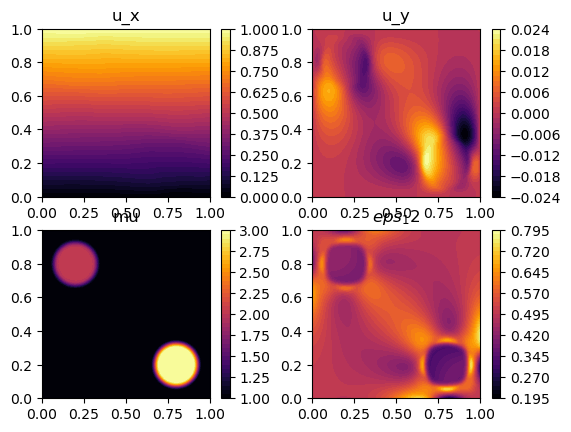

In [5]:
#Plot u 
u1, u2 = u.split()
plt.subplot(2,2,1)
p = df.plot(u1, title="u_x", cmap="inferno")
plt.colorbar(p) 

plt.subplot(2,2,2)
p = df.plot(u2, title="u_y", cmap="inferno")
plt.colorbar(p) 

plt.subplot(2,2,3)
p = df.plot(mu_function, title="mu", cmap="inferno")
plt.colorbar(p) 


plt.subplot(2,2,4)
p = df.plot(eps_12, title="$eps_12$", cmap="inferno")
plt.colorbar(p) 

### Inverse Problem - Noiseless data - Figure 3b

Solving linear variational problem.
Solving linear variational problem.
the L2-norm error for the reconstruction: 0.009883279484561738


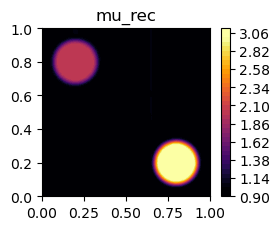

In [6]:
mu_rec, err, prim = no_reg_rec(
    u,
    mesh_params=mesh_params,
    mat_params=mat_params,
    load_params=load_params,
    compute_prim= True)

plt.subplot(2,2,3)
p = df.plot(mu_rec, title="mu_rec", cmap="inferno", vmin=1.0, vmax=3.0)
plt.colorbar(p) 

### Inverse Problem - noiseless data - Figure 4

In [7]:
Nx_coarse_list = [200, 100, 50, 40, 25, 20]
l = len(Nx_coarse_list)

Error_list = np.zeros(l)
h_list = np.zeros(l)

for s in range(l):
    Nx_coarse = Nx_coarse_list[s]
    mesh_params_coarse= {"Nx":Nx_coarse, "Ny":Nx_coarse, "degree":degree}
    k_0 = Nx/Nx_coarse
    mesh_coarse = df.UnitSquareMesh(Nx_coarse, Nx_coarse)
    degree_coarse = degree
    V1_coarse = df.VectorFunctionSpace(mesh_coarse, 'CG', degree_coarse)
    u_coarse = df.project(u, V1_coarse)
    mu_rec, err, prim_h= no_reg_rec(
        u_coarse,
        mesh_params=mesh_params_coarse,
        mat_params=mat_params,
        load_params=load_params,
        compute_prim= False,
        prim=prim
        )
    h_list[s] = 1/Nx_coarse
    Error_list[s] = err

print("h_list =", h_list)    
print("Error_list =", Error_list) 

    

Solving linear variational problem.
the L2-norm error for the reconstruction: 0.009883279492705939
Solving linear variational problem.
the L2-norm error for the reconstruction: 0.017014542075629902
Solving linear variational problem.
the L2-norm error for the reconstruction: 0.12796167106283005
Solving linear variational problem.
the L2-norm error for the reconstruction: 0.16048739304239326
Solving linear variational problem.
the L2-norm error for the reconstruction: 0.3579297615011259
Solving linear variational problem.
the L2-norm error for the reconstruction: 0.4573095655852746
h_list = [0.005 0.01  0.02  0.025 0.04  0.05 ]
Error_list = [0.00988328 0.01701454 0.12796167 0.16048739 0.35792976 0.45730957]


Convergence orders between points: [0.78370658 2.91087151 1.01497272 1.70662805 1.09805449]
Linear regression: slope = 1.81, intercept = 4.74


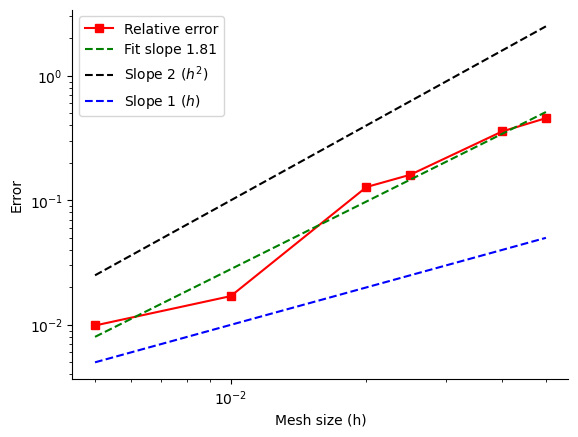

In [8]:
# Compute convergence rates between consecutive points
slope = np.log(Error_list[:-1] / Error_list[1:]) / np.log(h_list[:-1] / h_list[1:])
print("Convergence orders between points:", slope)

# Linear regression in log-log scale
log_h = np.log(h_list)
log_err = np.log(Error_list)

# Linear fit: log(Error) ≈ a * log(h) + b
a, b = np.polyfit(log_h, log_err, 1)
print(f"Linear regression: slope = {a:.2f}, intercept = {b:.2f}")

# Predicted error from the regression
fit_err = np.exp(a * log_h + b)

# --- Plot ---
fig, ax = plt.subplots()

# Error curve
ax.plot(h_list, Error_list, "-sr", label="Relative error")

# Regression line (log-log)
ax.plot(h_list, fit_err, "--g", label=f"Fit slope {a:.2f}")

# Reference slopes (1 and 2)
ref_error_2 = 1e3 * h_list**2
ax.plot(h_list, ref_error_2, "--k", label="Slope 2 ($h^2$)")

ref_error_1 = 1 * h_list
ax.plot(h_list, ref_error_1, "--b", label="Slope 1 ($h$)")

# Log scales
ax.set_xscale("log")
ax.set_yscale("log")

# Styling
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Mesh size (h)")
ax.set_ylabel("Error")
ax.legend()

plt.show()


### Inverse Problem - noisy data

In [9]:
ureal = u

Noise_list = np.array([1e-08, 5e-08, 1e-07, 5e-07, 1e-06,  2e-06, 5e-06])
Nx_coarse_list = [200, 100, 50, 40, 25, 20, 10]
l = len(Nx_coarse_list)
tol = 1e-15

k_list = []
size_noise = np.size(Noise_list)
Error_list_with_regularization = np.zeros((l, size_noise))
Error_list_without_regularization = np.zeros(size_noise)
h = ureal.vector().get_local()
a = h.shape 
V = u.function_space()
mesh = u.function_space().mesh()
dx = df.Measure("dx", domain=mesh)

### Inverse Problem - noisy data - Figure 3

Noise =  1e-08
Solving linear variational problem.
Solving linear variational problem.
the L2-norm error for the reconstruction: 0.01915095869247879
k_0= h_0/h_1= 1.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 1.283189220962681e-08
L2-norm error for the noisy approach with regularization 0.03592849984493479
k_0= h_0/h_1= 2.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 1.8004371902329729e-09
L2-norm error for the noisy approach with regularization 0.044778940771765544
k_0= h_0/h_1= 4.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 1.4323447730066638e-08
L2-norm error for the noisy approach with regularization 0.10660790685166667
k_0= h_0/h_1= 5.0
So

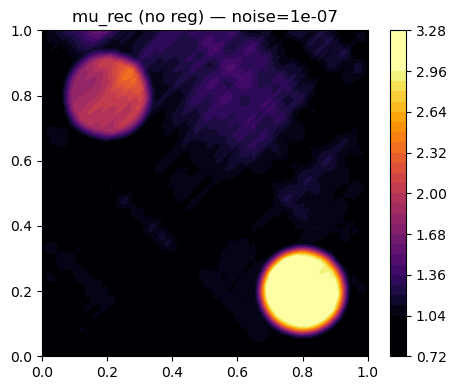

k_0= h_0/h_1= 1.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 1.492712578063524e-07
L2-norm error for the noisy approach with regularization 0.09451780415163423
k_0= h_0/h_1= 2.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 2.2786928560964334e-09
L2-norm error for the noisy approach with regularization 0.06783528099203788
k_0= h_0/h_1= 4.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 1.7132636380096198e-09
L2-norm error for the noisy approach with regularization 0.11072357704959356


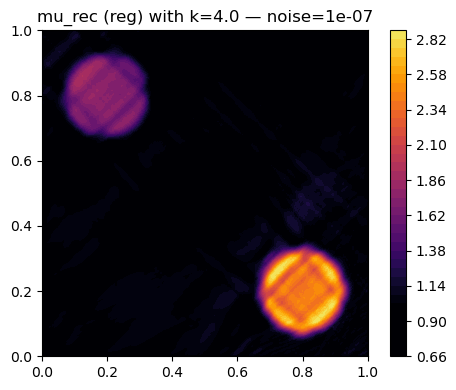

k_0= h_0/h_1= 5.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 2.2622732594591e-09
L2-norm error for the noisy approach with regularization 0.1028655398370928
k_0= h_0/h_1= 8.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 6.515460615055219e-07
L2-norm error for the noisy approach with regularization 0.4903122012433696
k_0= h_0/h_1= 10.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 4.0265899612730244e-09
L2-norm error for the noisy approach with regularization 0.3253279648966868
k_0= h_0/h_1= 20.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual nor

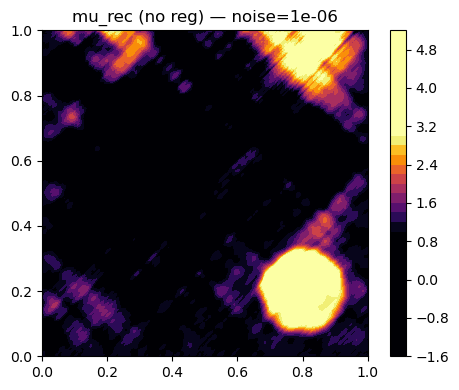

k_0= h_0/h_1= 1.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 5.8039871463054665e-08
L2-norm error for the noisy approach with regularization 1.0922420248144695
k_0= h_0/h_1= 2.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 9.00603529161197e-07
L2-norm error for the noisy approach with regularization 0.36773199122554373
k_0= h_0/h_1= 4.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 4.65724949682725e-09
L2-norm error for the noisy approach with regularization 0.17121971457822677


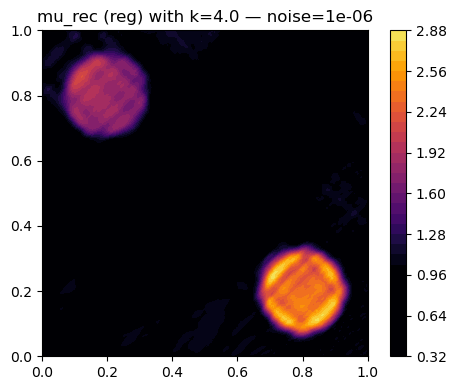

k_0= h_0/h_1= 5.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 2.4776124354333623e-09
L2-norm error for the noisy approach with regularization 0.12919152919520727
k_0= h_0/h_1= 8.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 5.75035915073416e-07
L2-norm error for the noisy approach with regularization 0.49300003330710424
k_0= h_0/h_1= 10.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual norm: 7.487992624096028e-09
L2-norm error for the noisy approach with regularization 0.3293690162996737
k_0= h_0/h_1= 20.0
Solving linear variational problem.
Solving linear variational problem.
Solver diverged due to high residual, but let's check the result.
Final residual 

In [ ]:
for k in range(size_noise) :
    print("Noise = ", Noise_list[k])
    noise_Expression = df.Function(V)

    for i in range(a[0]) :
        if k==1 :
           noise_Expression.vector()[i] = np.random.normal(0,Noise_list[k])
        else :
            noise_Expression.vector()[i] = np.random.normal(Noise_list[k-1],Noise_list[k])

    u_noised = df.Function(V)
    u_noised.vector()[:] = ureal.vector()[:] + noise_Expression.vector()[:] 

    #Without Projection
    mu_rec, err, prim= no_reg_rec( u_noised, 
                        mesh_params= mesh_params,
                        mat_params=mat_params,
                        load_params=load_params,
                        compute_prim=True)
    Error_list_without_regularization[k]= err
 
    if Noise_list[k] in [1e-7, 1e-6]:
        plt.figure(figsize=(5,4))
        p = df.plot(mu_rec, title=f"mu_rec (no reg) — noise={Noise_list[k]}", cmap="inferno", vmin=1.0, vmax=3.0)
        plt.colorbar(p)
        plt.tight_layout()
        plt.show(block=False)
        plt.pause(0.5) 

    #With regularization
    for s in range(l) :
        Nx_coarse = Nx_coarse_list[s]
        print("k_0= h_0/h_1=", k_0)

        #Least square problem
        mu_function_rec, err= rec_with_reg(
            u_noised,
            mesh_params,
            mat_params,
            Nx_coarse=Nx_coarse)

        if  (Nx_coarse_list[s]==50) and (Noise_list[k] in [1e-7, 1e-6]): 
            plt.figure(figsize=(5,4))
            p = df.plot(mu_function_rec, title=f"mu_rec (reg) with k={k_0} — noise={Noise_list[k]}", cmap="inferno", vmin=1.0, vmax=3.0)
            plt.colorbar(p)
            plt.tight_layout()
            plt.show(block=False)
            plt.pause(0.5) 

        Error_list_with_regularization[s,k] = err
 

    

In [ ]:
print("Noise=", Noise_list)

print("Error_with_regularization = ", Error_list_with_regularization)
print("Error_without_regularization = ", Error_list_without_regularization)


k_list= [1.0, 2.0, 4.0, 5.0, 8.0, 10.0, 20.0, 1.0, 2.0, 4.0, 5.0, 8.0, 10.0, 20.0, 1.0, 2.0, 4.0, 5.0, 8.0, 10.0, 20.0, 1.0, 2.0, 4.0, 5.0, 8.0, 10.0, 20.0, 1.0, 2.0, 4.0, 5.0, 8.0, 10.0, 20.0, 1.0, 2.0, 4.0, 5.0, 8.0, 10.0, 20.0, 1.0, 2.0, 4.0, 5.0, 8.0, 10.0, 20.0]
Noise= [1.e-08 5.e-08 1.e-07 5.e-07 1.e-06 2.e-06 5.e-06]
Error_with_regularization =  [[0.0359285  0.13490855 0.0945178  0.58313869 1.09224202 4.14846187
  6.13811824]
 [0.04477894 0.04968169 0.06783528 0.15955016 0.36773199 0.40966818
  2.41957735]
 [0.10660791 0.10850364 0.11072358 0.12640632 0.17121971 0.12263567
  0.46395139]
 [0.10270776 0.10285139 0.10286554 0.10371592 0.12919153 0.12232322
  0.26570262]
 [0.49021621 0.49048361 0.4903122  0.49304464 0.49300003 0.48452687
  0.49628515]
 [0.32521692 0.32538034 0.32532796 0.32472975 0.32936902 0.32008778
  0.33871468]
 [0.81490998 0.8149707  0.81491466 0.81500194 0.81526981 0.81293578
  0.81537236]]
Error_without_regularization =  [0.01915096 0.13535849 0.10105324 0.44

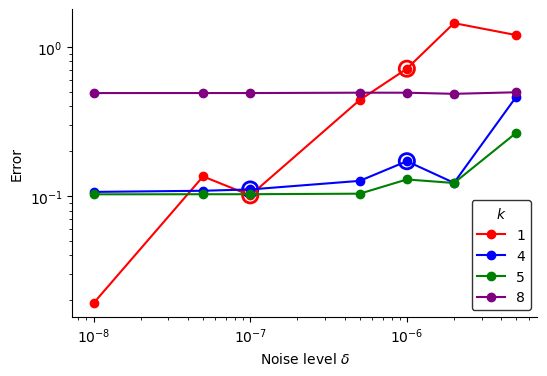

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(Noise_list, Error_list_without_regularization,  "-or", label="1")
ax.plot(Noise_list, Error_list_with_regularization[2,:], "-ob", label="4")
ax.plot(Noise_list, Error_list_with_regularization[3,:], "-og", label="5")
ax.plot(Noise_list, Error_list_with_regularization[4,:],  "-o", color="purple", label="8")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('Noise level $ \delta $')
ax.set_ylabel('Error')

ax.scatter([Noise_list[2], Noise_list[4]], [Error_list_with_regularization[2,2], Error_list_with_regularization[2,4]],
           facecolors='none', edgecolors='blue', s=120, linewidths=2, label="_nolegend_")

ax.scatter([Noise_list[2], Noise_list[4]], [Error_list_without_regularization[2], Error_list_without_regularization[4]],
           facecolors='none', edgecolors='red', s=120, linewidths=2, label="_nolegend_")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(frameon=True, edgecolor="black", facecolor="white", fontsize=10, title=r"$k$", title_fontsize=10)

plt.show()


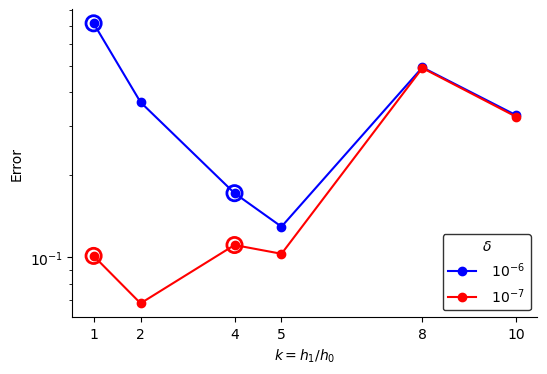

In [ ]:
#k_list = [Nx/x for x in Nx_coarse_list]
#print(k_list)
k_list=[1.0, 2.0, 4.0, 5.0, 8.0, 10.0]
fig, ax = plt.subplots(figsize=(6, 4))

y1_values = np.concatenate((
    [Error_list_without_regularization[4]],   
    Error_list_with_regularization[1:6, 4]    
))
ax.plot(k_list,y1_values,"-ob", label=" $10^{-6}$")


y2_values = np.concatenate((
    [Error_list_without_regularization[2]],  
    Error_list_with_regularization[1:6, 2]    
))
ax.plot(k_list,y2_values,"-or", label=" $10^{-7}$")

ax.set_yscale("log")
ax.set_xlabel('$k=h_1/h_0$')
ax.set_ylabel('Error')
ax.set_xticks(k_list)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.scatter([1, 4], y1_values[[0, 2]], facecolors='none', edgecolors='blue', s=120, linewidths=2,label="_nolegend_")
ax.scatter([1, 4], y2_values[[0, 2]], facecolors='none', edgecolors='red', s=120, linewidths=2, label="_nolegend_")

ax.legend(frameon=True, edgecolor="black", facecolor="white", fontsize=10, title=r"$\delta$", title_fontsize=10)
plt.show()

